In [1]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [2]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Implementing Random Forest, KNN and Logistic Regresion

Voting Classifier Metrics:
Accuracy: 0.7643154349118289
Recall: 0.8071914480077745
F1 Score: 0.777351427234441


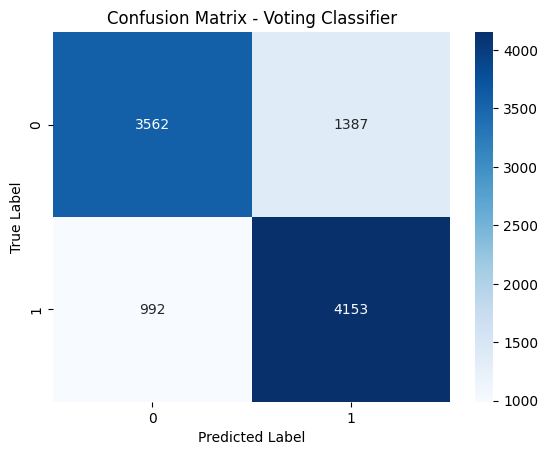

In [6]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest model
modelRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the KNN model 
modelKNN = KNeighborsClassifier(n_neighbors=12)

# Initialize the Logistic Regression model
modelLogistic = LogisticRegression(max_iter=500, random_state=42)

# Combine models using VotingClassifier with Random Forest as the meta-classifier
voting_model = VotingClassifier(
    estimators=[
        ('random_forest', modelRandomForest),
        ('knn', modelKNN),
        ('logistic', modelLogistic)
    ],
    voting='soft'  # 'soft' for averaging predicted probabilities
)

# Fit the models on the training data
modelRandomForest.fit(x_train, y_train)
modelKNN.fit(x_train, y_train)
modelLogistic.fit(x_train, y_train)
voting_model.fit(x_train, y_train)

# Make predictions on the test data for each model
y_prob_random_forest = modelRandomForest.predict_proba(x_test)
y_prob_knn = modelKNN.predict_proba(x_test)
y_prob_logistic = modelLogistic.predict_proba(x_test)
y_prob_voting = voting_model.predict_proba(x_test)

# Choose the class with the highest average probability as the final prediction
y_pred_voting = np.argmax(y_prob_voting, axis=1)

# Calculate evaluation metrics for the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Print the metrics for the voting classifier
print("Voting Classifier Metrics:")
print("Accuracy:", accuracy_voting)
print("Recall:", recall_voting)
print("F1 Score:", f1_voting)

# Plot the confusion matrix for the voting classifier
sns.heatmap(conf_matrix_voting, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()